In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from source.models import Models
from source.morph2 import Morph
from source.generation import Generation

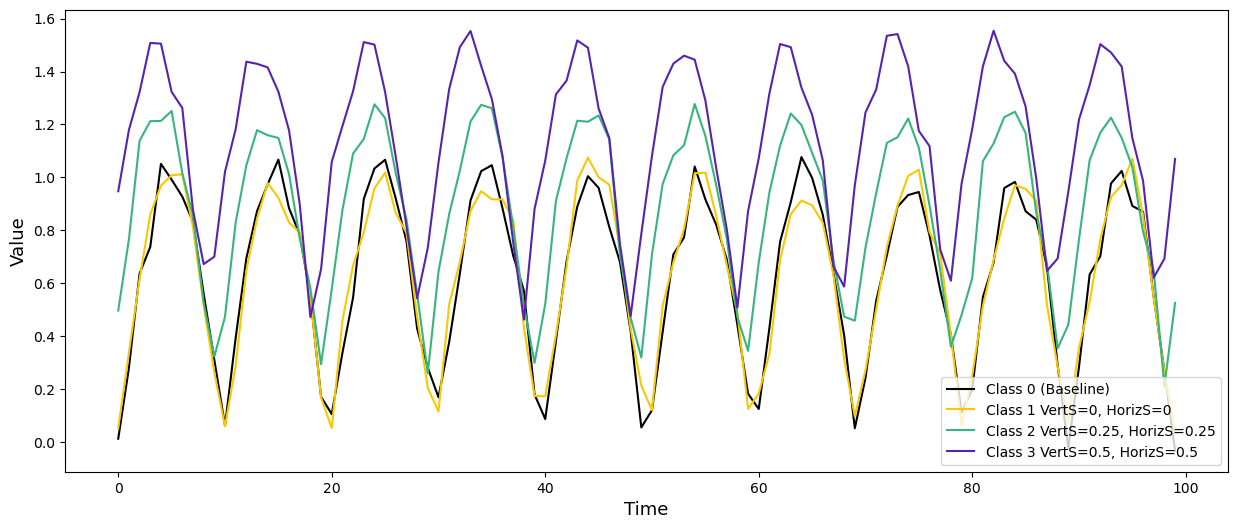

In [1]:
import matplotlib.pyplot as plt
from source.generation import Generation

shift_values = [0, 0.25, 0.5]
horiz = [1, 2, 3]
colors =['#FAC801', "#36B57C", "#5722B1"] 

plt.figure(figsize=(15, 6))

gen = Generation(base_functions=('sin', 'sin'), n_samples=2, frequencies=(0.5,0.5), noise_level=(0.05, 0.05)) 
X, y = gen.generate_data()
plt.plot(X[1].T, label=f'Class 0 (Baseline)', color='black')  # Assign color and label


for i, s in enumerate(shift_values):
    gen = Generation(base_functions=('sin', 'sin'), n_samples=2, frequencies=(0.5,0.5), noise_level=(0.05, 0.05), shift_vert=s, shif_horz=s) 
    X, y = gen.generate_data()
    plt.plot(X[0].T, color=colors[i], label=f'Class {i+1} VertS={s}, HorizS={s}')  # Assign color and label


plt.legend(loc='lower right')  # Show legend
plt.xlabel('Time', fontsize=13)
plt.ylabel('Value', fontsize=13)
#plt.title('Plot with Different Shift Values')
plt.show()

## Shift and Percentage Borderline Pairs Loop


In [2]:
shift_values = [0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.0]
final = {}
for b in [0.05, 0.10, 0.15, 0.20, 0.25]:
    results = {}
    for s in shift_values:
        # Generate dataset with shift
        gen = Generation(base_functions=('sin', 'sin'), n_samples=100, frequencies=(0.5,0.5), noise_level=(0.1, 0.1), shift_vert=s, shif_horz=s) 
        X, y = gen.generate_data()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train models
        lstm = Models('lstm', X_train, y_train.ravel())
        lstm.train_lstm()
        catch22 = Models('catch22', X_train, y_train)
        catch22.train_catch22()
        rocket = Models('rocket', X_train, y_train)
        rocket.train_rocket()

        # Calculate morphing
        res = {}
        morph = Morph(X_test, y_test)
        morph.get_DTWGlobalBorderline(X_test.shape[0]) 


        # pairs = morph.allborderline
        # class0 = morph.class0_X
        # class1 = morph.class1_X

        # # Define bins
        # bins = np.arange(0, 1.01, 0.1)

        # # Create a figure with subplots
        # num_bins = len(bins)
        # num_cols = 3  # Number of columns in the subplot grid
        # num_rows = (num_bins + num_cols - 1) // num_cols  # Calculate number of rows

        # fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
        # axes = axes.flatten()  # Flatten the axes array for easy iteration

        # # Plot for each bin
        # for i, b in enumerate(bins):
        #     key = get_key_at_percentile(pairs, b)

        #     # Plot Class 0 and Class 1
        #     axes[i].plot(class0[key[0]].T, label='Class 0')
        #     axes[i].plot(class1[key[1]].T, label='Class 1')
        #     axes[i].legend()
        #     axes[i].set_title(f"Key at {b:.2} percentile: {key}")

        # # Hide unused subplots
        # for j in range(i + 1, num_rows * num_cols):
        #     axes[j].axis('off')

        # plt.tight_layout()
        # plt.show()

        models = [lstm, catch22, rocket]
        res = morph.Binary_MorphingCalculater(models)

        results[s] = res
    final[b] = results

with open('results/correct.pkl', 'wb') as f:
    pickle.dump(final, f)

c:\Users\anton\anaconda3\envs\MIST\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anton\anaconda3\envs\MIST\lib\site-packages\sklearn\linear_model\_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
100%|██████████| 20/20 [00:21<00:00,  1.07s/it]
c:\Users\anton\anaconda3\envs\MIST\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anton\anaconda3\envs\MIST\lib\site-packages\sklearn\linear_model\_ridge.py:1303: DataConversionWarning: A co

In [1]:
def get_key_at_percentile(data, percentile):
    # Extract values and sort them
    sorted_values = sorted(data.values())
    
    # Calculate the value at the given percentile
    percentile_value = sorted_values[int(round(len(sorted_values) * percentile))]
    
    # Find the key whose value is closest to the percentile value
    closest_key = min(data.keys(), key=lambda k: abs(data[k] - percentile_value))
    
    return closest_key

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



pairs = mor.allborderline
class0 = mor.class0_X
class1 = mor.class1_X

# Define bins
bins = np.arange(0, 1.01, 0.1)

# Create a figure with subplots
num_bins = len(bins)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_bins + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot for each bin
for i, b in enumerate(bins):
    key = get_key_at_percentile(pairs, b)

    # Plot Class 0 and Class 1
    axes[i].plot(class0[key[0]].T, label='Class 0')
    axes[i].plot(class1[key[1]].T, label='Class 1')
    axes[i].legend()
    axes[i].set_title(f"Key at {b:.2} percentile: {key}")

# Hide unused subplots
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [10]:
shift_values = [0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.0]
results = {}
for s in shift_values:
    # Generate dataset with shift
    gen = Generation(base_functions=('sin', 'cos'), n_samples=100, frequencies=(0.5,0.5), noise_level=(0.1, 0.1), shift_vert=s, shif_horz=s) 
    X, y = gen.generate_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train models
    lstm = Models('lstm', X_train, y_train.ravel())
    lstm.train_lstm()
    catch22 = Models('catch22', X_train, y_train)
    catch22.train_catch22()
    rocket = Models('rocket', X_train, y_train)
    rocket.train_rocket()

    # Calculate morphing
    res = {}
    morph = Morph(X_test, y_test)
    morph.get_DTWGlobalBorderline(X_test.shape[0]) 
    print(X_test.shape[0])

        # pairs = morph.allborderline
        # class0 = morph.class0_X
        # class1 = morph.class1_X

        # # Define bins
        # bins = np.arange(0, 1.01, 0.1)

        # # Create a figure with subplots
        # num_bins = len(bins)
        # num_cols = 3  # Number of columns in the subplot grid
        # num_rows = (num_bins + num_cols - 1) // num_cols  # Calculate number of rows

        # fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
        # axes = axes.flatten()  # Flatten the axes array for easy iteration

        # # Plot for each bin
        # for i, b in enumerate(bins):
        #     key = get_key_at_percentile(pairs, b)

        #     # Plot Class 0 and Class 1
        #     axes[i].plot(class0[key[0]].T, label='Class 0')
        #     axes[i].plot(class1[key[1]].T, label='Class 1')
        #     axes[i].legend()
        #     axes[i].set_title(f"Key at {b:.2} percentile: {key}")

        # # Hide unused subplots
        # for j in range(i + 1, num_rows * num_cols):
        #     axes[j].axis('off')

        # plt.tight_layout()
        # plt.show()

    models = [lstm, catch22, rocket]
    res = morph.Binary_MorphingCalculater(models)

    results[s] = res


with open('results/correct.pkl', 'wb') as f:
    pickle.dump(results, f)

c:\Users\anton\anaconda3\envs\MIST\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anton\anaconda3\envs\MIST\lib\site-packages\sklearn\linear_model\_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20


100%|██████████| 20/20 [00:31<00:00,  1.59s/it]
c:\Users\anton\anaconda3\envs\MIST\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anton\anaconda3\envs\MIST\lib\site-packages\sklearn\linear_model\_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20


100%|██████████| 20/20 [00:30<00:00,  1.53s/it]
c:\Users\anton\anaconda3\envs\MIST\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anton\anaconda3\envs\MIST\lib\site-packages\sklearn\linear_model\_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20


100%|██████████| 20/20 [00:30<00:00,  1.51s/it]
c:\Users\anton\anaconda3\envs\MIST\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anton\anaconda3\envs\MIST\lib\site-packages\sklearn\linear_model\_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20


100%|██████████| 20/20 [00:30<00:00,  1.52s/it]
c:\Users\anton\anaconda3\envs\MIST\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anton\anaconda3\envs\MIST\lib\site-packages\sklearn\linear_model\_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20


100%|██████████| 20/20 [00:30<00:00,  1.54s/it]
c:\Users\anton\anaconda3\envs\MIST\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anton\anaconda3\envs\MIST\lib\site-packages\sklearn\linear_model\_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20


100%|██████████| 20/20 [00:30<00:00,  1.51s/it]
c:\Users\anton\anaconda3\envs\MIST\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anton\anaconda3\envs\MIST\lib\site-packages\sklearn\linear_model\_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20


100%|██████████| 20/20 [00:30<00:00,  1.53s/it]
c:\Users\anton\anaconda3\envs\MIST\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anton\anaconda3\envs\MIST\lib\site-packages\sklearn\linear_model\_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20


100%|██████████| 20/20 [00:30<00:00,  1.52s/it]
c:\Users\anton\anaconda3\envs\MIST\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anton\anaconda3\envs\MIST\lib\site-packages\sklearn\linear_model\_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20


100%|██████████| 20/20 [00:31<00:00,  1.59s/it]
c:\Users\anton\anaconda3\envs\MIST\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anton\anaconda3\envs\MIST\lib\site-packages\sklearn\linear_model\_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20


100%|██████████| 20/20 [00:30<00:00,  1.53s/it]
c:\Users\anton\anaconda3\envs\MIST\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anton\anaconda3\envs\MIST\lib\site-packages\sklearn\linear_model\_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20


100%|██████████| 20/20 [00:30<00:00,  1.54s/it]


In [12]:
with open('results/correct.pkl', 'wb') as f:
    pickle.dump(final, f)

columns = ['shift_val', 'model', 'mean', 'std']

data = []
for shift_val in results.keys():
    for model in results[shift_val].keys():
        metrics = results[shift_val][model]['metrics']
        line = [shift_val, model, metrics['mean'], metrics['std']]
        data.append(line)

# save to csv
df = pd.DataFrame(data, columns=columns)
df.to_csv('correct.csv', index=False)

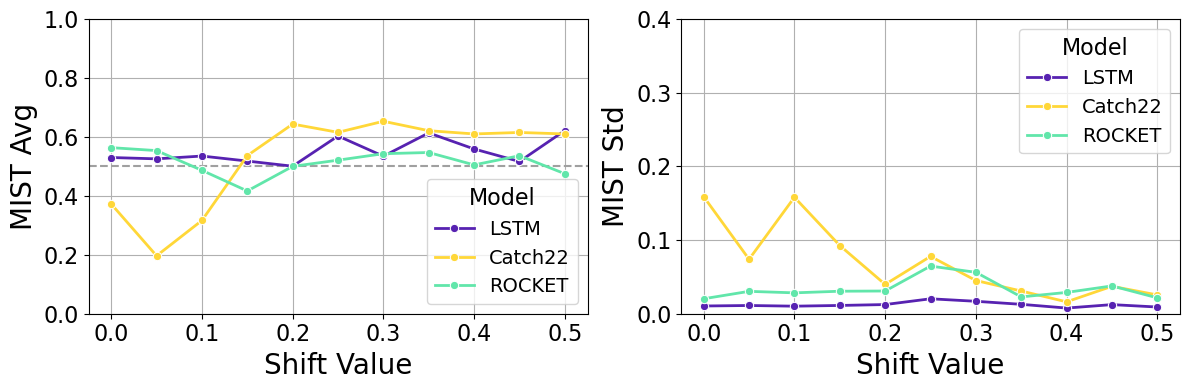

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#df = pd.read_csv('final_results/bord_perc_shift_perf.csv')

colors = ["#5722B1", '#FFD738', "#61E6AA"]
markers = ['o', 's', 'D']
custom_legend_labels = ["LSTM", "Catch22", "ROCKET"]  

subset = df
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].axhline(y=0.5, color='#A0A0A0', linestyle='--')

# Plot Mean Morphing Percentage
sns.lineplot(
    data=subset, x="shift_val", y="mean", 
    hue="model", marker='o', 
    palette=colors, ax=axes[0], linewidth=2
)

# Fix axis limit 
axes[0].set_ylim(0, 1)
axes[0].tick_params(axis='both', which='major', labelsize=16)
axes[0].set_xlabel("Shift Value", fontsize=20)
axes[0].set_ylabel("MIST Avg", fontsize=20)
    
# Set custom legend for the first subplot
handles, _ = axes[0].get_legend_handles_labels()
axes[0].legend(handles, custom_legend_labels, title="Model", fontsize=14, title_fontsize=16)
axes[0].grid(True)

# Plot Standard Deviation
sns.lineplot(
    data=subset, x="shift_val", y="std", 
    hue="model", 
    palette=colors, marker='o', ax=axes[1], linewidth=2
)
    
# Fix axis limit and increase font size
axes[1].set_ylim(0, 0.4)
axes[1].tick_params(axis='both', which='major', labelsize=16)    
axes[1].set_xlabel("Shift Value", fontsize=20)
axes[1].set_ylabel("MIST Std", fontsize=20)
    
# Set custom legend for the second subplot
handles, _ = axes[1].get_legend_handles_labels()
axes[1].legend(handles, custom_legend_labels, title="Model", fontsize=14, title_fontsize=16)
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Distance to Class Boundary

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from aeon.datasets import load_classification

X, y = load_classification("ECG200")

y = np.where(y == '-1', 0, y)
y = y.astype(np.float64)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [3]:
#gen = Generation(base_functions=('sin', 'sin'), n_samples=100, frequencies=(0.5,0.5), noise_level=(0.05, 0.05), shift_vert=0.2, shif_horz=0.2)
#X, y = gen.generate_data()
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rocket = Models('rocket', X_train, y_train)
rocket.train_rocket()
morph = Morph(X_test, y_test, target_class=1)
morph.get_DTWGlobalBorderline(perc_samples=0.2)

res = morph.Binay_MorphingCalculater(rocket)

In [7]:
res[2]

{(4, 5): 0.68,
 (2, 17): 0.47,
 (2, 31): 0.56,
 (6, 14): 0.71,
 (2, 18): 0.53,
 (2, 8): 0.62,
 (2, 14): 0.61,
 (2, 13): 0.44,
 (4, 14): 0.66,
 (4, 17): 0.57,
 (0, 17): 0.77,
 (2, 1): 0.55,
 (6, 17): 0.6,
 (2, 20): 0.66,
 (7, 7): 0.5,
 (5, 19): 0.62,
 (0, 14): 0.68,
 (1, 5): 0.77,
 (6, 5): 0.73,
 (2, 27): 0.47,
 (6, 31): 0.65,
 (2, 6): 0.61,
 (0, 20): 0.81,
 (2, 26): 0.4,
 (2, 5): 0.63}

In [ ]:
# return morphs, preds, results, metrics
# self.borderline_pair

source = []
target = []
for p in morph.borderline_pairs.keys(): # Dict {(x,y):distance}
    source.append(p[0])
    target.append(p[1])

source = set(source)
target = set(target)
print(source)
print(target)

mean_morph = {}
for s in source:
    morphs = []
    for p in morph.borderline_pairs.keys():
        if p[0] == s:
            print(res[2][p])
            morphs.append(res[2][p])
    mean_morph[s] = np.mean(morphs)

print(mean_morph)

{0, 1, 2, 3, 4, 5, 6, 7}
{0, 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20, 21, 23, 25, 26, 27, 29, 30, 31}


KeyError: (0, 23)

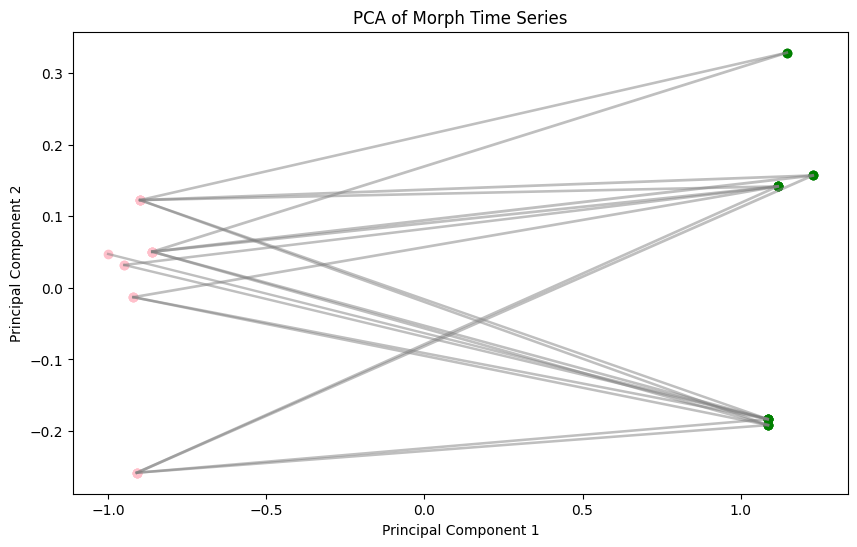

In [43]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Combine both classes for PCA fitting
combined_data = np.vstack([
    morph.class0_X.reshape(morph.class0_X.shape[0], -1),
    morph.class1_X.reshape(morph.class1_X.shape[0], -1)
])

# Fit PCA on combined data
pca = PCA(n_components=3)
pca.fit(combined_data)

# Transform each class
pca_c0 = pca.transform(morph.class0_X.reshape(morph.class0_X.shape[0], -1))
pca_c1 = pca.transform(morph.class1_X.reshape(morph.class1_X.shape[0], -1))

# Plotting
plt.figure(figsize=(10, 6))

# Plot the pair
for pair in morph.borderline_pairs.keys():
    # Plot the points
    plt.scatter(pca_c0[pair[0], 0], pca_c0[pair[0], 1], 
               color='green', marker='o')
    plt.scatter(pca_c1[pair[1], 0], pca_c1[pair[1], 1], 
               color='pink', marker='o')
    
    # Plot the connection between pair
    plt.plot([pca_c0[pair[0], 0], pca_c1[pair[1], 0]], 
             [pca_c0[pair[0], 1], pca_c1[pair[1], 1]], 
             'gray', alpha=0.5, linewidth=res[2][pair] * 4)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Morph Time Series")
plt.show()

In [ ]:
# apply PCA to the morphs
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(res[0])